<a href="https://colab.research.google.com/github/taufiksatrian/freeCodeCamp-Machine-Learning-with-Python/blob/main/Neural-Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Neural Networks**

### **Neural Networks with TensorFlow**

### **Activation Functions**

Activation Funtions
- Relu (rectified Linear Unit)
- Sigmoid = values 0 and 1
- Tanh (Hyperbolic Tangent) = values between -1 and 1

Some common loss/cost functions include
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

Gradient Descent

### **Optimizers**

Optimizier function is A function that implements the gradient descent and backpropagation algorithms for you.

Common optimizer
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

**Imports**

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Dataset**

MNIST Fashion Dataset, this is a dataset that is included in keras

This dataset includes 60.000 images for training and 10.000 images for validation/testing

In [2]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist

#split into testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# shape
train_images.shape

(60000, 28, 28)

so we've 60.000 images that are made up of 28x28 pixels (784 int total)

In [4]:
# look at one pixel
train_images[0,23,23]

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale images as there no color channels

In [5]:
# look at the first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers from 0-9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angkle boot']

Look at what some of these images look like

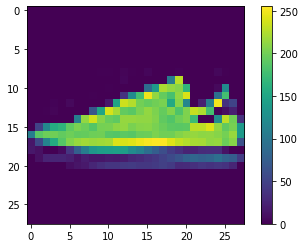

In [7]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

**Data Preprocessing**

Applying some prio transformations to our data before feeding it the model. in this case we will simply scale all of our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. we do this because smaller values will make it easier fro the model to process our values

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### **Creating a Model**

**Building the Model**

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #input layer(1)
    keras.layers.Dense(128, activation='relu'),   #input layer(2)
    keras.layers.Dense(10, activation='softmax')  #input layer(3)
])

**Compiling the Model**

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training the Model**

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4947 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3708 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3332 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3107 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2790 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2585 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2470 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

**Evaluating the Model**

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3271 - accuracy: 0.8866
Test Accuracy:  0.8866000175476074


**Making Predictions**

313/313 [==============================] - 0s 1ms/step
[2.4658418e-09 8.7833172e-09 5.7119665e-10 2.3551888e-10 9.9008099e-09
 2.3064453e-05 4.5917389e-08 2.6554936e-03 1.5154864e-08 9.9732137e-01]
9
Angkle boot


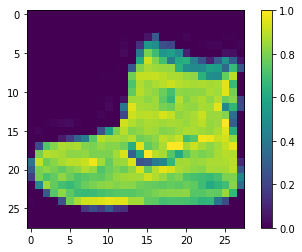

In [13]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
test_images.shape

(10000, 28, 28)

**Verifiying Predictions**

Pick a number: 0
1/1 [==============================] - 0s 16ms/step


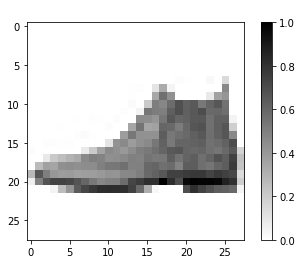

In [15]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angkle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excepted: " + label)
  plt.xlabel("Gues: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

### **Full Code**

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


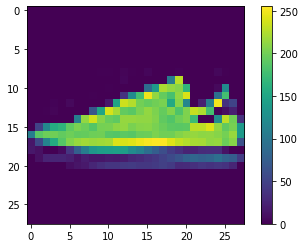

In [16]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #split into testing and training

train_images.shape

train_images[0,23,23] # look at one pixel

train_labels[:10] # look at the first 10 training labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angkle boot']

plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),    #input layer(1)
    keras.layers.Dense(128, activation='relu'),   #input layer(2)
    keras.layers.Dense(10, activation='softmax')  #input layer(3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5015 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3748 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3353 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2964 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2562 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2480 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.240

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3392 - accuracy: 0.8797
Test Accuracy:  0.8797000050544739


313/313 [==============================] - 0s 1ms/step
Angkle boot


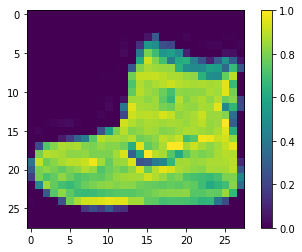

In [20]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 0
1/1 [==============================] - 0s 18ms/step


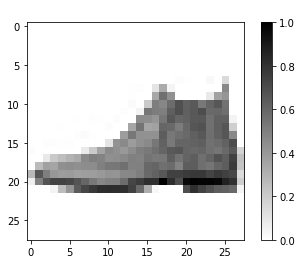

In [21]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angkle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excepted: " + label)
  plt.xlabel("Gues: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
      else:
        print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)